### 강의에서 소개된 파이썬 주요 기능
- statsmodels.formula.api.ols: https://www.statsmodels.org/dev/generated/statsmodels.formula.api.ols.html
- statsmodels.regression.linear_model.OLS: https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html
- statsmodels.regression.linear_model.OLS.fit: https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.fit.html

### 슈팅 횟수와 득점 횟수 간 선형 회귀

In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

##### (1) 예시 경기 슈팅 및 득점 횟수 시각화

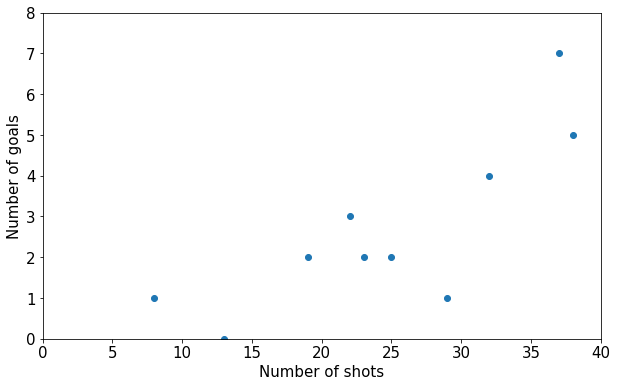

In [2]:
plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 15})

shot_counts = np.array([8, 38, 32, 22, 29, 13, 25, 37, 19, 23])
goal_counts = np.array([1, 5, 4, 3, 1, 0, 2, 7, 2, 2])
plt.scatter(shot_counts, goal_counts)

plt.xlim(0, 40)
plt.ylim(0, 8)
plt.xlabel('Number of shots')
plt.ylabel('Number of goals')
plt.show()

##### (2) 슈팅 횟수와 득점 횟수 간 선형 관계식 학습 - 상수항 포함

In [3]:
data = pd.DataFrame({'x': shot_counts, 'y': goal_counts})
smf.ols(formula='y ~ x', data=data)


In [4]:
data = pd.DataFrame({'x': shot_counts, 'y': goal_counts})
model_fit = smf.ols(formula='y ~ x', data=data).fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     14.98
Date:                Wed, 20 Dec 2023   Prob (F-statistic):            0.00474
Time:                        12:40:48   Log-Likelihood:                -15.857
No. Observations:                  10   AIC:                             35.71
Df Residuals:                       8   BIC:                             36.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5930      1.185     -1.344      0.2

C:\Users\User\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [5]:
model_fit.params

Intercept   -1.592964
x            0.174511
dtype: float64

##### (3) 선형 회귀 결과와 관측치 비교 - 상수항 포함

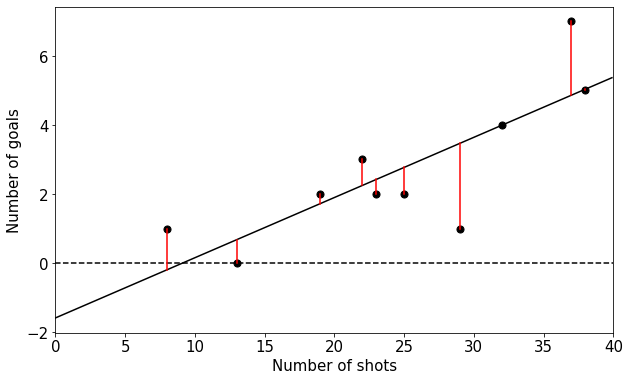

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(shot_counts, goal_counts, c='black', s=50)

a = model_fit.params[0]
b = model_fit.params[-1]
x = np.arange(40, step=0.1)
y = a + b * x
plt.plot(x, y, c='black')

for i, n in enumerate(shot_counts):
    plt.plot([n, n], [goal_counts[i], a + b * n], c='red')

plt.xlim(0, 40)
plt.hlines(0, 0, 40, linestyles='--', color='black')
plt.xlabel('Number of shots')
plt.ylabel('Number of goals')
plt.show()

##### (4) 슈팅 횟수와 득점 횟수 간 선형 관계식 학습 - 상수항 제외

In [7]:
data = pd.DataFrame({'x': shot_counts, 'y': goal_counts})
model_fit = smf.ols(formula='y ~ x - 1', data=data).fit()
print(model_fit.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.849
Model:                            OLS   Adj. R-squared (uncentered):              0.832
Method:                 Least Squares   F-statistic:                              50.44
Date:                Wed, 20 Dec 2023   Prob (F-statistic):                    5.66e-05
Time:                        12:41:04   Log-Likelihood:                         -16.875
No. Observations:                  10   AIC:                                      35.75
Df Residuals:                       9   BIC:                                      36.05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\User\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [8]:
model_fit.params

x    0.1178
dtype: float64

##### (5) 선형 회귀 결과와 관측치 비교 - 상수항 제외

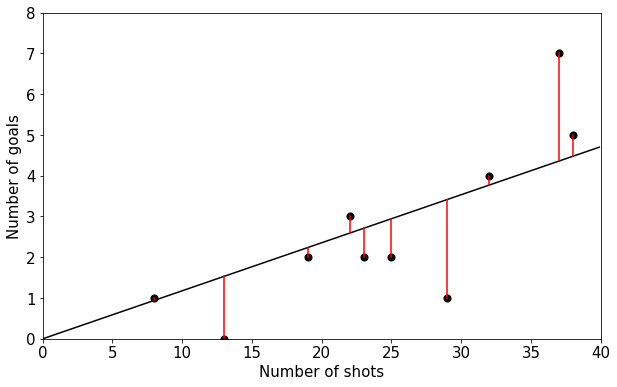

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(shot_counts, goal_counts, c='black', s=50)

b = model_fit.params[0]
x = np.arange(40, step=0.1)
y = b * x
plt.plot(x, y, c='black')

for i, n in enumerate(shot_counts):
    plt.plot([n, n], [goal_counts[i], b * n], c='red')

plt.xlim(0, 40)
plt.ylim(0, 8)
plt.xlabel('Number of shots')
plt.ylabel('Number of goals')
plt.show()